# in kingkong how many steps does it take on average to get the reward

In [1]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

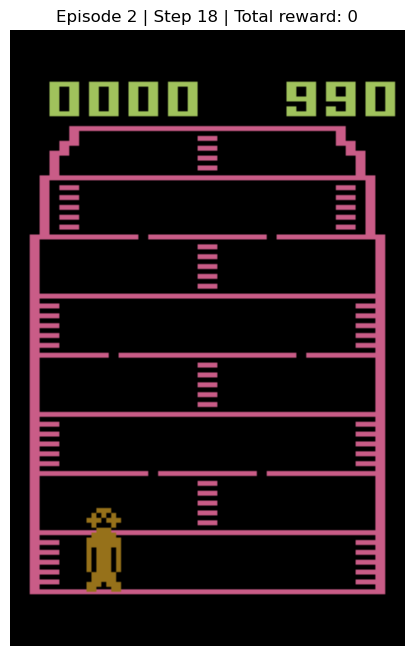

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time
import ale_py
import numpy as np

# --- Create environment ---
env = gym.make("ALE/KingKong-v5", render_mode="rgb_array")

n_episodes = 5       # Number of episodes to play
max_steps = 1000     # Max steps per episode
frame_delay = 0.03   # 30ms delay ≈ 33fps

steps_to_reward = []

# --- Prepare display ---
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis("off")

for episode in range(n_episodes):
    observation, info = env.reset()
    total_reward = 0
    got_reward = False

    print(f"\n🎬 Episode {episode+1}/{n_episodes} starting...")

    for step in range(max_steps):
        # Random action (replace with your policy if desired)
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # --- Visual update ---
        frame = env.render()
        clear_output(wait=True)
        ax.clear()
        ax.imshow(frame)
        ax.set_title(f"Episode {episode+1} | Step {step} | Total reward: {total_reward:.0f}")
        ax.axis("off")
        display(fig)
        time.sleep(frame_delay)

        # --- Record first reward ---
        if reward != 0 and not got_reward:
            steps_to_reward.append(step + 1)
            got_reward = True
            print(f"💰 Reward obtained at step {step+1}")

        # --- End of episode ---
        if terminated or truncated:
            break

    if not got_reward:
        steps_to_reward.append(np.nan)
        print("⚠️ No reward obtained this episode.")

plt.close(fig)
env.close()

# --- Report average ---
valid_steps = [s for s in steps_to_reward if not np.isnan(s)]
if valid_steps:
    avg_steps = np.mean(valid_steps)
    print(f"\n✅ Average steps to first reward: {avg_steps:.2f} (across {len(valid_steps)} successful episodes)")
else:
    print("\n⚠️ No rewards obtained in any episode.")
